# Homework 2: Analyzing Rates of Sea Level Rise
In this homework, you'll investigate sea level change using data from the ECCO state estimate. You'll look at spatial differences over the past few decades and then compare how sea level on the California coast compares to the global mean.

Begin by importing the modules you'll need for this notebook:

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## Part 1: Download Sea Surface Height Data
To begin this exercise, download all of the available sea surface height data (1992-2017) from the ECCO Version 4 Release 4 output. There are several different variables for sea surface height pertaining to different components and corrections. In this homework, we'll use the `SSHDYN` variable which is equivalent to what satellites would measure from space.

To obtain the data, use the [Downloading ECCO Data](https://github.com/ProfMikeWood/ocean_modeling_book/blob/main/tools/Downloading%20ECCO%20Data.ipynb) notebook provided with the course notes.

In [9]:
# define the path to the folder where the SSH data has been download on your machine
data_folder = '/Users/masonjones/Desktop/MS274/HW2'

## Part 2: Plot Total Sea Level Rise 1992-2017
As a first look into how sea level has changed in the past several decades, we'll look at the differences between two time periods at the beginning and end of the available model output: January 1992 and January 2017. It is important to use the same month because variations in sea level also have a seasonal cycle (as we'll see below). Begin by reading in the data:

In [70]:
# read in the longitude, latitude, and model ssh grid in January 1992 (SSHDYN_1992_01.nc)
old_file = os.path.join(data_folder,'Version4','Release4',
                          'interp_monthly','SSHDYN','SSHDYN_1992_01.nc')
ds = xr.open_dataset(old_file)
longitude = np.array(ds['longitude'][:])
latitude = np.array(ds['latitude'][:])
SSHDYN_old = np.array(ds['SSHDYN'][:])
ds.close()


# read in the model ssh grid in January 2017 (SSHDYN_2017_01.nc)
new_file = os.path.join(data_folder,'Version4','Release4',
                          'interp_monthly','SSHDYN','SSHDYN_2017_01.nc')
ds = xr.open_dataset(new_file)
SSHDYN_new = np.array(ds['SSHDYN'][:])
ds.close()

Now, make a plot of the difference between January 2017 and January 1992. Be sure to add a colorbar with a divergent colormaps and set the color bounds to be equal in the positive and negative directions.

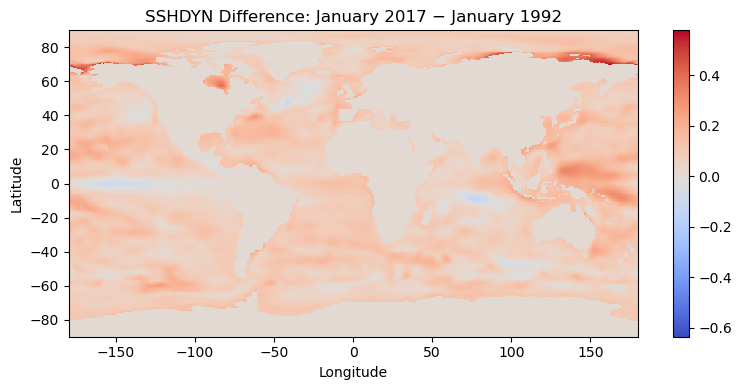

In [69]:
fig = plt.figure(figsize=(8,4))
SSH_diff = SSHDYN_new[0, :, :] - SSHDYN_old[0, :, :]

#color bounds equal in both directions
v = np.nanmax(np.abs(SSH_diff))

plt.pcolormesh(longitude, latitude, SSH_diff, cmap='coolwarm', vmin=v, vmax=-v, shading="auto")
plt.colorbar()
plt.title("SSHDYN Difference: January 2017 − January 1992")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

### Questions:
Where are the largest increases in sea level observed between these two time periods? Are there any locations on the globe where sea level has fallen? If so, where?

Answer: *Enter your answer here*

## Part 3: Create a Timeseries of Sea Surface Height in California
Next, we'll make a timeseries of sea surface height at a point off the California coast near San José. A close location in the model is at 37$^{\circ}$N, 122$^{\circ}$W. Begin by finding the closest row and column in the model grid to this longitude and latitude.

In [71]:
# find the lon index closest to -122 E
lon_index = np.argmin(np.abs((-122) - longitude))

# find the lat index closest to 37 N
lat_index = np.argmin(np.abs((37) - latitude))


# sanity check
print('Closest longitude to -122 in the longitude array is' , longitude[lon_index])
print('Closest latitude to 37 in the longitude array is' , latitude[lat_index])



Closest longitude to -122 in the longitude array is -122.25
Closest latitude to 37 in the longitude array is 36.75


Now, armed with your sample location, loop through each sea surface height file to make a timeseries of sea level rise between 1992 and 2017. Every time you access a file, sample the model grid at the row and column you identified above.

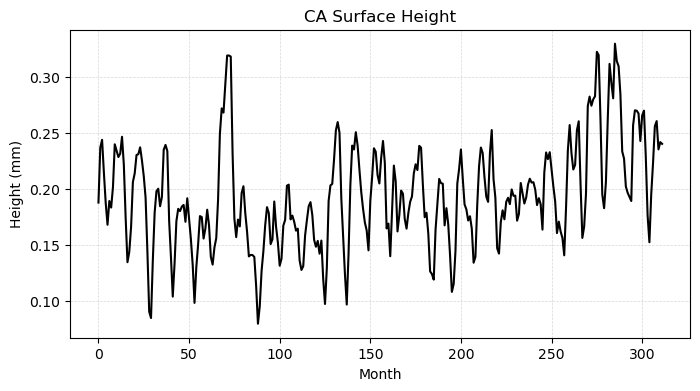

In [39]:
# create a timeseries of ssh at the point above by looping through all of the ssh files
## make a list to contain the file names
file_list = []

# loop through the 12 months
for year in range(1992, 2018): 
    for month in range(1, 13):
        file_list.append('SSHDYN_' + str(year) + '_' + '{:02d}'.format(month) + '.nc')

# print out the file names
#print(file_list)

# make a list to store the temperature values
temperature_values = []

# loop through each file
for file_name in file_list:
    
    # identify path to the data file
    year_file = os.path.join(data_folder,'Version4','Release4',
                          'interp_monthly','SSHDYN',file_name)
    
    # read in the data 
    ds = xr.open_dataset(year_file)
    SSHDYN_year = np.array(ds['SSHDYN'][:])
    ds.close()

    # add the data point from the surface of CA to
    # the list of temperatures
    CA_SSHDYN = SSHDYN_year[0, lat_index, lon_index]
    temperature_values.append(CA_SSHDYN)

# convert list to a numpy array
temperature_values = np.array(temperature_values)

# make a figure
fig = plt.figure(figsize=(8,4))

# plot the temperatures in black
plt.plot(temperature_values, 'k-')

# format the axes
plt.ylabel('Height (mm)')
plt.xlabel('Month')
plt.title('CA Surface Height')
plt.grid(linestyle='--',linewidth=0.5,alpha=0.5)

# show the plot
plt.show()

## Part 4: Create a Timeseries of Global Mean Sea Surface Height
Next, make a timeseries of sea surface height averaged across the globe. Your loop should look quite similar to that above - you'll just need to make a slight change to average across the whole ocean rather than sampling at a single point.

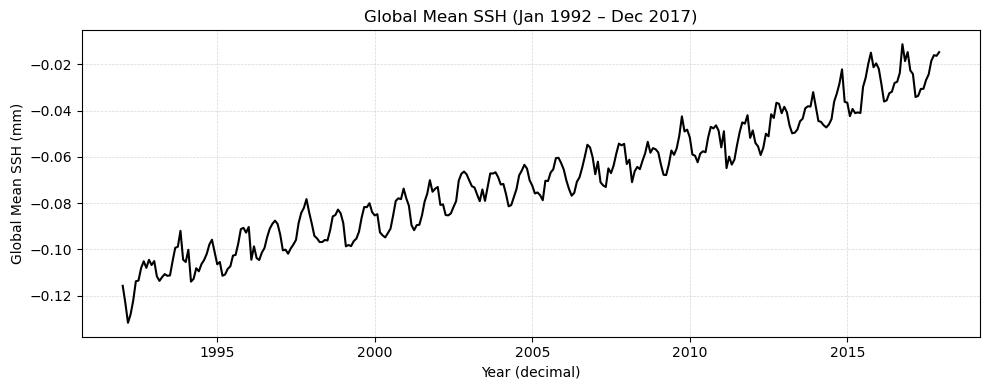

In [72]:
# create a timeseries of the global mean ssh by looping through all of the ssh files
# each time through the loop, take the mean of the ssh grid at the row and column identified above
# when you take the mean, be sure to exclude 0 values, which pertain to land
# your timeseries should be an (N,2) array with time in the first column and ssh values in the second
# loop through the years
for year in range(1992, 2018): 
    for month in range(1, 13):
        file_list.append('SSHDYN_' + str(year) + '_' + '{:02d}'.format(month) + '.nc')

times_decimal = []   
ssh_means = []       

for year in range(1992, 2018):
    for month in range(1, 13):
        file_name = 'SSHDYN_' + str(year) + '_' + '{:02d}'.format(month) + '.nc'
        year_file = os.path.join(data_folder, 'Version4', 'Release4', 'interp_monthly', 'SSHDYN', file_name)
        
        ds = xr.open_dataset(year_file)
        SSHDYN_month = np.array(ds['SSHDYN'][:])  
        ds.close()
        
        # Exclude land
        SSHDYN_masked = np.where(SSHDYN_month == 0, np.nan, SSHDYN_month)
        mean_val = np.nanmean(SSHDYN_masked)
        t_decimal = year + (month - 1) / 12.0
        times_decimal.append(t_decimal)
        ssh_means.append(mean_val)


times_decimal = np.array(times_decimal)
ssh_means = np.array(ssh_means)
timeseries = np.column_stack((times_decimal, ssh_means))

plt.figure(figsize=(10, 4))
plt.plot(timeseries[:, 0], timeseries[:, 1], 'k-')
plt.ylabel('Global Mean SSH (mm)')
plt.xlabel('Year (decimal)')
plt.title('Global Mean SSH (Jan 1992 – Dec 2017)')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.tight_layout()
plt.show()


## Part 5: Compute Trends in Sea Surface Height
To compare the two timeseries, compute trends by fitting a line to each timeseries and examining the slope. Print out each trend in mm/yr, rounded to 2 decimal places. Note that the units of sea surface height are in meters.

In [77]:
# compute the trends in SLR by fitting a line to the CA and the global mean timeseries
# compute the line coefficients
years = []
for year in range(1992, 2018):
    for month in range(1, 13):
        years.append(year + (month - 1)/12.0)
years = np.array(years, dtype=float)

coeffs = np.polyfit(years, temperature_values, deg=1)  
trend_line = np.polyval(coeffs, years)
print('Trend slope =', round(coeffs[0]* 1000,2),'mm/year')

# print out the statistics in mm/yr for each timeseries
file_list = []

for year in range(1992, 2018): 
    for month in range(1, 13):
        file_list.append('SSHDYN_' + str(year) + '_' + '{:02d}'.format(month) + '.nc')

times_decimal = []   
ssh_means = []       

for year in range(1992, 2018):
    for month in range(1, 13):
        file_name = 'SSHDYN_' + str(year) + '_' + '{:02d}'.format(month) + '.nc'
        year_file = os.path.join(
            data_folder, 'Version4', 'Release4', 'interp_monthly', 'SSHDYN', file_name)

        ds = xr.open_dataset(year_file)
        SSHDYN_month = np.array(ds['SSHDYN'][:])   
        ds.close()

        # Exclude land
        SSHDYN_masked = np.where(SSHDYN_month == 0, np.nan, SSHDYN_month)
        mean_val = np.nanmean(SSHDYN_masked)

        t_decimal = year + (month - 1) / 12.0
        times_decimal.append(t_decimal)
        ssh_means.append(mean_val)
        

coeff2= np.polyfit(times_decimal, ssh_means, 1)
trend_line = np.polyval(coeff2, times_decimal)
print('Trend slope =', round(coeff2[0] * 1000, 2), 'mm/year')

Trend slope = 2.08 mm/year
Trend slope = 3.38 mm/year


### Question:
How does the trend in sea level rise in California compare to the global mean rate?

Answer: The trends are both positive but the Global trend is much higher at 3.38 mm/year whereas the CA trend is 2.08 mm/year.

## Part 6: Plot the Timeseries of Sea Surface Height
Finally, plot the two timeseries on the same plot along with their trend lines. Be sure to label your axes and include a legend.

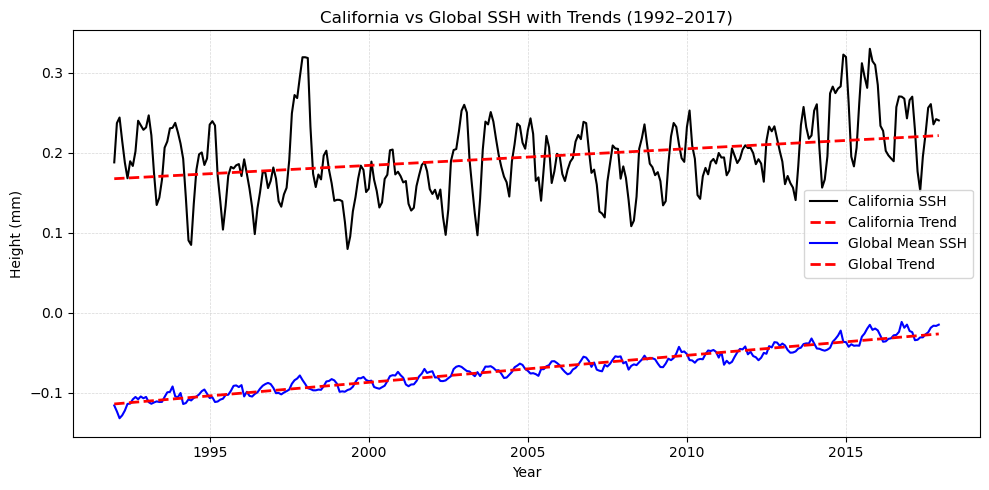

In [52]:
plt.figure(figsize=(10, 5))

# California
plt.plot(years, temperature_values, 'k-', label='California SSH')
plt.plot(years, trend_line_CA , 'r--', linewidth=2, label='California Trend')

# Global
plt.plot(times_decimal, ssh_means, 'b-', label='Global Mean SSH')
plt.plot(times_decimal, trend_line_global, 'r--', linewidth=2, label='Global Trend')

plt.ylabel('Height (mm)')
plt.xlabel('Year')
plt.title('California vs Global SSH with Trends (1992–2017)')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

### Questions:

How do the timeseries for Calfiornia and the global mean compare? Comment on their variability. What are the two highest years of sea level in California? What oceanographic phenomenon happened during this time?

Answer: The means of these time series are both increasing but with much different variablity. The california timeseries has a much larger variablity interannually due to local oceanographic and climatological like the ENSO occilations. Whereas the global variablity is much more stable due to shear mass of the earth and only ice sheet melt/freeze effects the SSH.